In [1]:
#importing libraries
import matplotlib.pyplot as plt
import cv2
import skimage
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore") 

In [67]:
#loading dataset
TRAIN_DIR = "chest_xray/train/"
VAL_DIR =  "chest_xray/val/"
TEST_DIR =  "chest_xray/test/"

In [68]:
#storing pneumonia and normal images to particular folder
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

In [69]:
import re
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

In [70]:
classes = os.listdir(TRAIN_DIR)
classes = [name_correct(i) for i in classes]

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


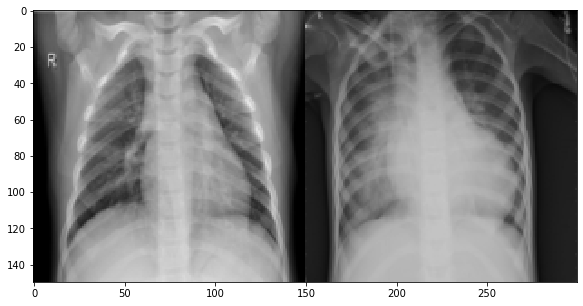

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


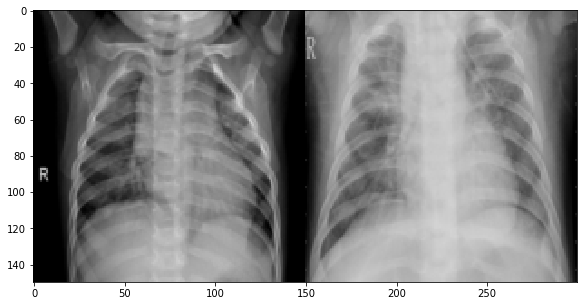

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


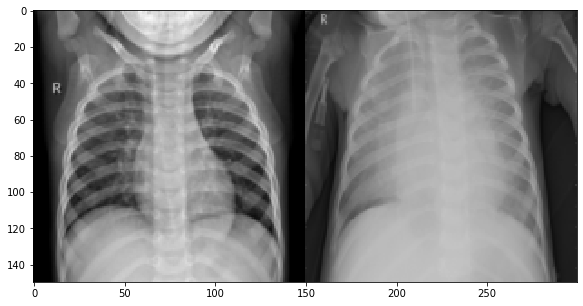

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


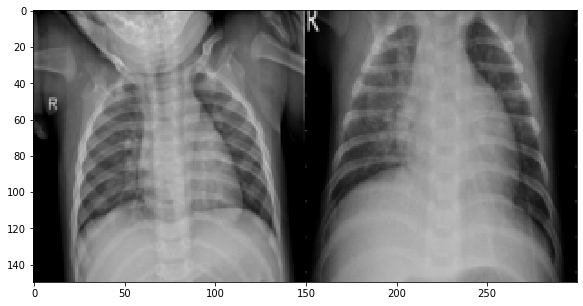

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


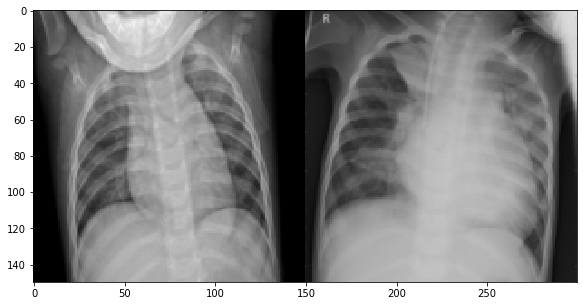

In [71]:
# plotting both the images side-wise
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5,10):
    plotter(i)

In [38]:
#preparing dataset
def get_data(Dir):
    print(Dir)
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
            print(temp)
                
            for file in os.listdir(temp):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(299, 299, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [9]:
import tqdm

X_train, y_train = get_data(TRAIN_DIR)

chest_xray/train/
chest_xray/train/NORMAL
chest_xray/train/PNEUMONIA


In [44]:
X_test, y_test = get_data(TEST_DIR)

chest_xray/test/
chest_xray/test/NORMAL
chest_xray/test/PNEUMONIA


In [72]:
X_val, y_val = get_data(VAL_DIR)

chest_xray/val/
chest_xray/val/NORMAL
chest_xray/val/PNEUMONIA


In [45]:
np.save('X_test.npy', X_test)
np.save('X_train.npy', X_train)
np.save('X_val.npy', X_val)

np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
np.save('y_val.npy', y_test)


In [40]:
# X_train = np.load('X_train.npy')
# X_test = np.load('X_test.npy')
# y_train = np.load('y_train.npy')
# y_test = np.load('y_test.npy')

In [73]:

from keras.utils.np_utils import to_categorical
import tensorflow as tf

Y_train = to_categorical(y_train, 2)
Y_test = to_categorical(y_test, 2)
Y_val = to_categorical(y_val, 2)


In [74]:
X_train.shape

(5216, 150, 150, 3)

In [75]:
y_train.shape

(5216, 2)

In [76]:
X_test.shape

(624, 150, 150, 3)

In [80]:
X_val.shape

(16, 150, 150, 3)

In [15]:
from pathlib import Path
import pandas as pd
import glob
# Get the path to the normal and pneumonia sub-directories
# Define path to the data directory


# Get the list of all the images
normal_cases =glob.glob(TRAIN_DIR+'/Normal/*.jpeg')
pneumonia_cases = glob.glob(TRAIN_DIR+'/Pneumonia/*.jpeg')


# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,chest_xray/train//Pneumonia\person573_bacteria...,1
1,chest_xray/train//Normal\IM-0505-0001.jpeg,0
2,chest_xray/train//Pneumonia\person1476_bacteri...,1
3,chest_xray/train//Pneumonia\person1590_bacteri...,1
4,chest_xray/train//Pneumonia\person881_virus_15...,1


1    3875
0    1341
Name: label, dtype: int64


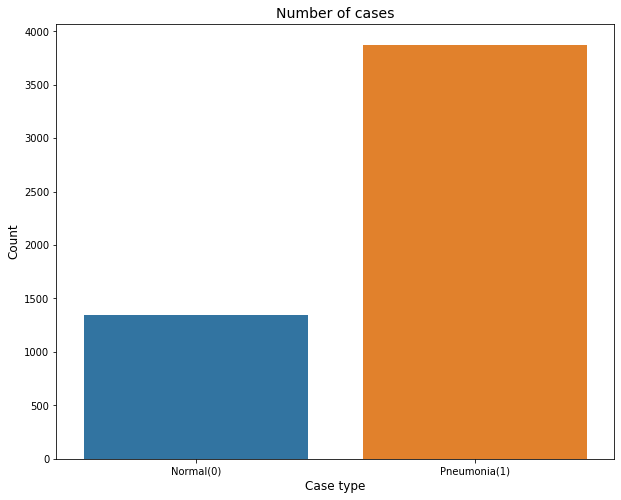

In [16]:
import seaborn as sns
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [17]:
import keras

from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense

In [18]:
from keras.optimizers import SGD , RMSprop , Adadelta , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [19]:
from keras.applications.inception_v3 import InceptionV3
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [20]:
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='sigmoid')(x)

In [21]:
model = Model(inputs=base_model.input, outputs=predictions)

In [22]:
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [23]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [110]:

batch_size = 100
epochs = 5

In [111]:
# from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
# lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=2)

# filepath="transferlearning_weights.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=2, save_best_only=True, mode='max')

In [112]:
history = model.fit(X_train, y_train, validation_data = (X_val , Y_val) ,verbose=2,
          epochs=epochs,batch_size = batch_size)

Train on 5216 samples, validate on 16 samples
Epoch 1/5
 - 694s - loss: 0.0387 - accuracy: 0.9854 - val_loss: 0.1188 - val_accuracy: 0.8750
Epoch 2/5
 - 694s - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.4620 - val_accuracy: 0.9375
Epoch 3/5
 - 694s - loss: 0.0134 - accuracy: 0.9946 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4/5
 - 685s - loss: 0.0146 - accuracy: 0.9942 - val_loss: 0.0494 - val_accuracy: 0.9375
Epoch 5/5
 - 711s - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.8416 - val_accuracy: 0.7500


In [113]:
predictions = model.predict(X_test)

In [114]:
predictions

array([[1.8258691e-03, 9.4424075e-01],
       [1.6424912e-01, 9.0922451e-01],
       [3.0335486e-03, 9.4054770e-01],
       ...,
       [1.8739700e-04, 9.4484735e-01],
       [1.7726421e-04, 9.4468939e-01],
       [1.5929341e-04, 9.4573522e-01]], dtype=float32)

In [115]:
y_pred = predictions.argmax(axis=-1)

In [116]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_confusion_matrix

precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("%s%.2f%s"% ("Accuracy-Score      : ", accuracy*100,        "%"))
print("-"*90)
print("\n\n")



------------------------------------------------------------------------------------------
Derived Report
------------------------------------------------------------------------------------------
Precision     : 70.52%
Recall        : 100.00%
F1-Score      : 82.71%
Accuracy-Score      : 73.88%
------------------------------------------------------------------------------------------





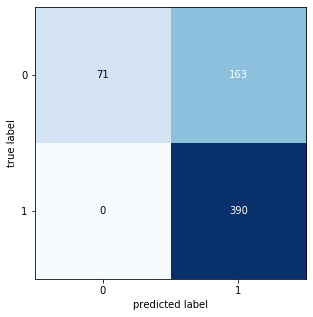

In [122]:
CM = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [123]:
# Get the list of all the images
normal_cases =glob.glob(TEST_DIR+'/Normal/*.jpeg')
pneumonia_cases = glob.glob(TEST_DIR+'/Pneumonia/*.jpeg')


# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    
    test_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    test_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)

# Shuffle the data 
test_data = test_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
test_data.head()

,image,label
0,chest_xray/test//Pneumonia\person108_bacteria_...,1
1,chest_xray/test//Normal\NORMAL2-IM-0327-0001.jpeg,0
2,chest_xray/test//Pneumonia\person1_virus_11.jpeg,1
3,chest_xray/test//Normal\NORMAL2-IM-0317-0001.jpeg,0
4,chest_xray/test//Pneumonia\person121_bacteria_...,1


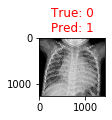

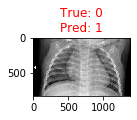

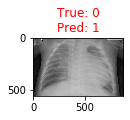

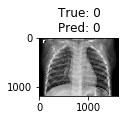

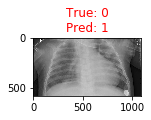

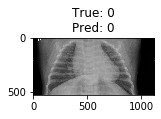

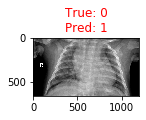

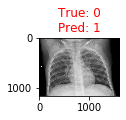

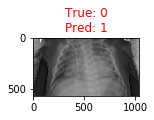

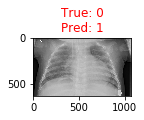

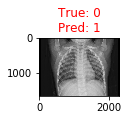

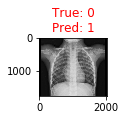

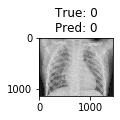

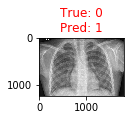

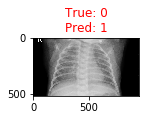

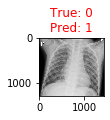

In [124]:

# print(original)
# print(predicted)

ncols = 4

nrows = 4

count = ncols*nrows


original = y_test[:count]
predicted = y_pred[:count]
for i in range(0,count):
    plt.figure(figsize=(10,10))
    plt.subplot(8,4,i+1)
    title_text = ("%s%s%s%s%s"%("True: ", original[i], "\n", "Pred: ", predicted[i]))
    img = cv2.imread(test_data['image'][i])
    
    if original[i]==predicted[i]:
        plt.title(title_text)
    else:
        plt.title(title_text, color='red')
    plt.imshow(img)

In [ ]:
# this is the results after running for 5 epochs only !